# HNCDI Explain: Mathematical Fundamentals of Quantum Computing

## Tutorial 1: Create a Bell state on a Simulator and on IBMQ

In [1]:
# Default imports
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile

from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService

from qiskit_ibm_provider import IBMProvider

from qiskit.compiler import transpile

from qiskit.visualization import *
from ibm_quantum_widgets import *

provider = IBMProvider() # loads account from env variables

In [2]:
# Notebook imports
from qiskit_ibm_provider import least_busy

# pi approximation
from qiskit import assemble
from qiskit_ibm_provider.job import job_monitor
import matplotlib.pyplot as plt

## Create your Bell state circuit

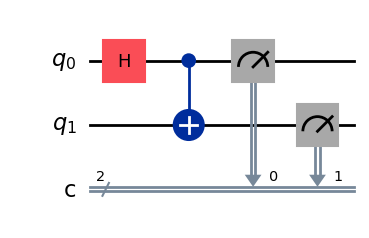

In [3]:
# Create your Bell state circuit

number_of_qubits = 2 #TODO: add qubits
number_of_classical_bits = 2#TODO: add classical bits

qreg_q = QuantumRegister(number_of_qubits, 'q')
creg_c = ClassicalRegister(number_of_classical_bits, 'c')

circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

circuit.draw()

## Submit Bell state circuit to a simulator

In [4]:
simulator_backend = AerSimulator()

In [5]:
# Submit job to simulator backend
simulator_job = simulator_backend.run(circuit, shots=1024).result()

In [6]:
# List measurement outcomes
simulator_job_counts = simulator_job.get_counts()
simulator_job_counts

{'00': 503, '11': 521}

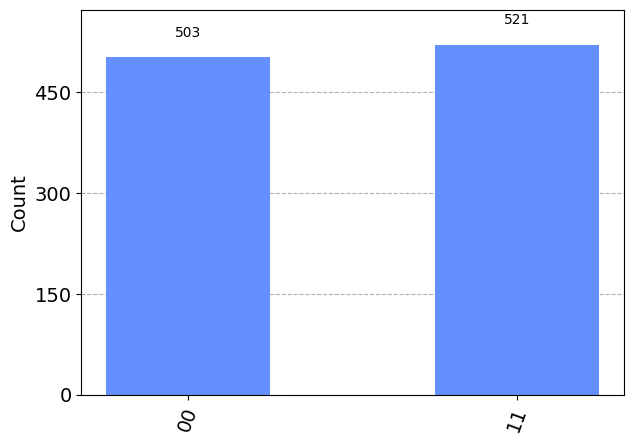

In [7]:
# Plot measurement outcomes 
plot_histogram(simulator_job_counts)

## Submit your Bell state circuit to real quantum hardware

In [8]:
# View backends
provider.backends()

[<IBMBackend('ibm_torino')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('ibm_cusco')>,
 <IBMBackend('ibm_hanoi')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibm_algiers')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_nazca')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibmq_mumbai')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_cairo')>,
 <IBMBackend('ibmq_qasm_simulator')>]

In [9]:
# Find least busy machine to submit a job to. Set IBMQ backend to this machine.

ibmq_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                            and not x.configuration().simulator 
                                            and x.status().operational==True))                
ibmq_backend

<IBMBackend('ibm_nazca')>

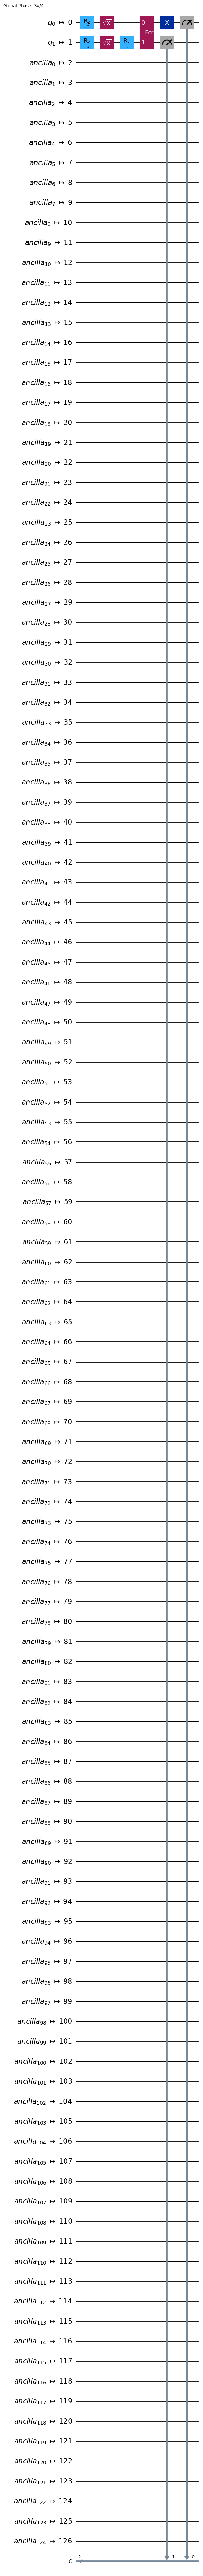

In [10]:
# Transpile your circuit for the IBMQ backend
transpiled_circuit = transpile(circuit, ibmq_backend)
transpiled_circuit.draw()

In [12]:
# Submit job to IBMQ backend
ibmq_job = ibmq_backend.run(transpiled_circuit, shots=1024).result()

In [14]:
# List measurement outcomes
ibmq_job_counts = ibmq_job.get_counts()
ibmq_job_counts

{'01': 19, '11': 486, '00': 486, '10': 33}

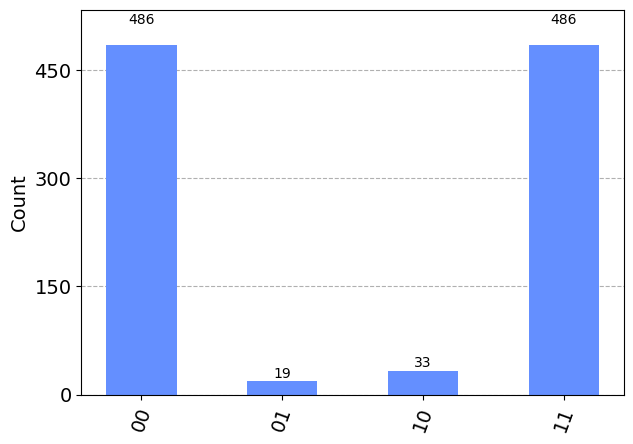

In [15]:
# Plot measurement outcomes
plot_histogram(ibmq_job_counts)